# Sort List
Given the ```head``` of a linked list, return the list after sorting it in **ascending** order.

**Example 1:**

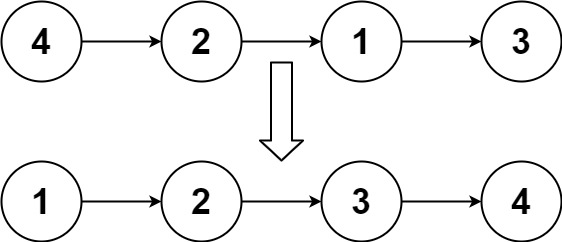



```
Input: head = [4,2,1,3]
Output: [1,2,3,4]
```

**Example 2:**

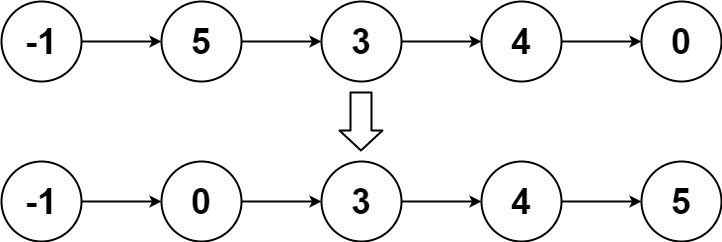

```
Input: head = [-1,5,3,4,0]
Output: [-1,0,3,4,5]
```

**Example 3:**

```
Input: head = []
Output: []
```

**Constraints:**

*   The number of nodes in the list is in the range ```[0,5*10^4]```
*   ```-10^5 <= Node.val <= 10^5```

**Follow up:** Can you sort the linked list in ```O(nlogn)``` time and ```O(1)``` memory (i.e., constant space)?

In [ ]:
class ListNode:
  """
    Use this class to create the linked list
  """
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next

  def get_next(self):
    return self.next

  def get_val(self):
    return self.val

**Approach**
The approach we will use is Merge Sort:

* Base Case: If the length of the linked list is less than or equal to 1, then the list is already sorted.
* Split the linked list into two halves. We will use the "slow and fast pointer" technique to find the midpoint of the linked list.
* Recursively sort the left and right halves of the linked list.
* Merge the two sorted halves of the linked list.

**Complexity**
Time complexity:
O(n log n) because we are dividing the linked list in half log n times, and merging the two halves in linear time.

Space complexity:
O(log n) because the space used by the call stack during the recursive calls is log n.

In [ ]:
from typing import List

def sort_list(head: ListNode) -> List[ListNode]:
  if head is None or head.next is None:
    return head

  # Find the middle of the linked list
  slow = head
  fast = head.next
  while fast is not None and fast.next is not None:
      slow = slow.next
      fast = fast.next.next

  # Split the linked list into two halves
  mid = slow.next
  slow.next = None

  # Recursively sort the two halves
  left = sort_list(head)
  right = sort_list(mid)

  # Merge the sorted halves
  dummy = ListNode(0)
  curr = dummy
  while left is not None and right is not None:
      if left.val < right.val:
          curr.next = left
          left = left.next
      else:
          curr.next = right
          right = right.next
      curr = curr.next

  if left is not None:
      curr.next = left
  else:
      curr.next = right

  return dummy.next

The function takes the head of a linked list as input, and returns the head of the sorted linked list.

The approach used in this implementation is called merge sort. We recursively divide the linked list into two halves until we reach a base case of a single node or no nodes. Then, we merge the sorted halves using a dummy node to create the final sorted linked list.

**Time and space complexity analysis**

The time complexity of the previous algorithm is O(n log n), where n is the number of nodes in the linked list. This is because the algorithm uses a recursive divide-and-conquer approach to split the linked list into smaller halves until there are only one or no nodes left in each half. The time complexity of each recursive call is O(n), since we need to iterate through each node in the linked list to split it into two halves. The merging of the two halves in each recursive call takes O(n) time as well, since we need to compare each node in both halves to determine the order in which they are merged. Thus, the total time complexity is O(n log n) since the number of recursive calls is log n.

The space complexity of the algorithm is O(log n), which is the maximum depth of the recursive call stack. This is because we need to store the state of each recursive call, including the pointers to the start and end nodes of the linked list. Since the number of recursive calls is log n, the space complexity of the algorithm is O(log n). In addition to the recursive call stack, the algorithm uses a constant amount of additional space to create a dummy node and temporary pointers, so the overall space complexity is O(log n) + O(1) = O(log n).

# Tests



In [ ]:
def create_linked_list(l: List[int]) -> ListNode:
  assert len(l) != 0
  head = ListNode(val=l[0])

  curr_head = head
  for i in range(1, len(l)):
    new_node = ListNode(val=l[i])
    curr_head.next = new_node
    curr_head = new_node

  return head

Example 1:

In [ ]:
head = create_linked_list([4,2,1,3])
sorted_head = sort_list(head)

Example 2:

In [ ]:
head = create_linked_list([-1,5,3,4,0])
sorted_head = sort_list(head)

Example 3:

In [ ]:
print(sort_list(None))

# Merge similar items


You are given two 2D integer arrays, ```items1``` and ```items2``` representing two sets of items. Each array items has the following properties:

* ```items[i] = [value_i, weight_i]``` where ```value_i``` represents the value and ```weight_i``` represents the weight of the ith item.
* The value of each item in ```items``` is **unique**.

Return a 2D integer array ```ret``` where ```ret[i] = [value_i, weight_i]```, with ```weight_i``` being the sum of weights of all items with value ```value_i```.

Note: ```ret``` should be returned in **ascending** order by value.

**Example 1:**
```
Input: items1 = [[1,1],[4,5],[3,8]], items2 = [[3,1],[1,5]]
Output: [[1,6],[3,9],[4,5]]
Explanation: 
The item with value = 1 occurs in items1 with weight = 1 and in items2 with weight = 5, total weight = 1 + 5 = 6.
The item with value = 3 occurs in items1 with weight = 8 and in items2 with weight = 1, total weight = 8 + 1 = 9.
The item with value = 4 occurs in items1 with weight = 5, total weight = 5.  
Therefore, we return [[1,6],[3,9],[4,5]].
```

**Example 2:**
```
Input: items1 = [[1,1],[3,2],[2,3]], items2 = [[2,1],[3,2],[1,3]]
Output: [[1,4],[2,4],[3,4]]
Explanation: 
The item with value = 1 occurs in items1 with weight = 1 and in items2 with weight = 3, total weight = 1 + 3 = 4.
The item with value = 2 occurs in items1 with weight = 3 and in items2 with weight = 1, total weight = 3 + 1 = 4.
The item with value = 3 occurs in items1 with weight = 2 and in items2 with weight = 2, total weight = 2 + 2 = 4.
Therefore, we return [[1,4],[2,4],[3,4]].
```

**Example 3:**
```
Input: items1 = [[1,3],[2,2]], items2 = [[7,1],[2,2],[1,4]]
Output: [[1,7],[2,4],[7,1]]
Explanation:
The item with value = 1 occurs in items1 with weight = 3 and in items2 with weight = 4, total weight = 3 + 4 = 7. 
The item with value = 2 occurs in items1 with weight = 2 and in items2 with weight = 2, total weight = 2 + 2 = 4. 
The item with value = 7 occurs in items2 with weight = 1, total weight = 1.
Therefore, we return [[1,7],[2,4],[7,1]].
```

**Constraints:**


* ```1 <= items1.length, items2.length <= 1000```
* ```items1[i].length == items2[i].length == 2```
* ```1 <= value_i, weight_i <= 1000```
* Each ```value_i``` in ```items1``` is unique.
* Each ```value_i``` in ```items2``` is unique.

To solve this problem, we can first create a dictionary to keep track of the weight of each value in both arrays. Then, we can iterate over both arrays and update the weight in the dictionary for each value. Finally, we can create the output array by iterating over the keys of the dictionary and creating a 2D array for each key with the corresponding weight.

In [ ]:
from typing import List

def merge_similar_items(items1: List[List[int]], items2: List[List[int]]) -> List[List[int]]:
  value_weight = {}
  for value, weight in items1 + items2: #O(n+m)
    if value not in value_weight:
      value_weight[value] = 0
    value_weight[value] += weight
  
  ret = []
  keys = list(value_weight.keys())
  n = len(keys)
  for i in range(n): #O(nm)
    for j in range(n-i-1):
      if keys[j] > keys[j+1]:
        keys[j], keys[j+1] = keys[j+1], keys[j]
  
  for value in keys:
    ret.append([value, value_weight[value]])
  
  return ret

In this code, we first create an empty dictionary **value_weight** to store the weight of each value. We then iterate over both input arrays **items1** and **items2**, and for each item, we update the weight of its value in the dictionary. If the value is not already in the dictionary, we initialize its weight to 0 before adding the weight of the item.

After we've computed the weight of each value, we create a list of keys *keys* by calling the *keys* method on the dictionary and converting it to a list. We then sort the list using bubble sort, which compares adjacent pairs of keys and swaps them if they are out of order.

Finally, we iterate over the sorted keys and create a 2D array for each key with the corresponding value and weight. We then return the resulting array *ret*, which contains the items grouped by value and sorted in ascending order by value.

# Sort the Matrix Diagonally

A **matrix diagonal** is a diagonal line of cells starting from some cell in either the topmost row or leftmost column and going in the bottom-right direction until reaching the matrix's end. For example, the matrix diagonal starting from ```mat[2][0]```, where ```mat``` is a ```6 x 3``` matrix, includes cells ```mat[2][0]```, ```mat[3][1]```, and ```mat[4][2]```.

Given an ```m x n``` matrix mat of integers, sort each **matrix diagonal** in ascending order and return the resulting matrix.

**Example 1:**

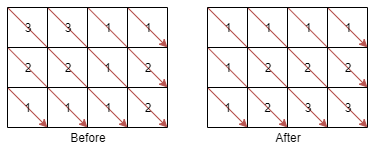


```
Input: mat = [[3,3,1,1],[2,2,1,2],[1,1,1,2]]

Output: [[1,1,1,1],[1,2,2,2],[1,2,3,3]]
```



**Example 2:**

```
Input: mat = [[11,25,66,1,69,7],[23,55,17,45,15,52],[75,31,36,44,58,8],[22,27,33,25,68,4],[84,28,14,11,5,50]]

Output: [[5,17,4,1,52,7],[11,11,25,45,8,69],[14,23,25,44,58,15],[22,27,31,36,50,66],[84,28,75,33,55,68]]
```


**Constraints:**
```
*   m == mat.length
*   n = mat[i].length
*   1 <= m, n <= 100
*   1 <= mat[i][j] <= 100
```




In [ ]:
from typing import List

def diagonalSort(mat: List[List[int]]) -> List[List[int]]:
  m, n = len(mat), len(mat[0])
  diagonals = {}

  # Step 1: Collect values for each diagonal
  for i in range(m):
    for j in range(n):
      if i-j not in diagonals:
        diagonals[i-j] = []
      diagonals[i-j].append(mat[i][j])

  # Step 2: Sort each diagonal and put values back into matrix
  for k in diagonals:
    diagonals[k].sort(reverse=True)
    for i in range(m):
      j = i-k
      if j >= 0 and j < n:
        mat[i][j] = diagonals[k].pop()

  return mat

The algorithm works as follows:

1. We create an empty dictionary ```diagonals``` to store the values for each diagonal. We iterate over each cell in the matrix and add the value of the cell to the list for the corresponding diagonal in the dictionary. We use the key ```i-j``` to identify the diagonal that includes cell ```(i, j)```.

2. We sort the values for each diagonal in descending order, and then iterate over each cell in the matrix again. For each cell ```(i, j)```, we calculate the key ```k = i-j``` to determine the diagonal that includes the cell. We then pop the smallest value from the list of values for the diagonal, and assign it to the cell ```(i, j)``` in the matrix.

By sorting each diagonal in descending order, and then assigning the smallest values to the cells in the matrix, we effectively sort each diagonal in ascending order. The time complexity of the algorithm is ```O(mn log(min(m,n)))``` due to the sorting of each diagonal, where m and n are the dimensions of the matrix.

# Heaters

Winter is coming! During the contest, your first job is to design a standard heater with a fixed warm radius to warm all the houses.

Every house can be warmed, as long as the house is within the heater's warm radius range. 

Given the positions of ```houses``` and ```heaters``` on a horizontal line, return the minimum radius standard of heaters so that those heaters could cover all houses.

**Notice** that all the ```heaters``` follow your radius standard, and the warm radius will the same.

**Example 1:**

```
Input: houses = [1,2,3], heaters = [2]
Output: 1
Explanation: The only heater was placed in the position 2, and if we use the radius 1 standard, then all the houses can be warmed.
```

**Example 2:**


```
Input: houses = [1,2,3,4], heaters = [1,4]
Output: 1
Explanation: The two heater was placed in the position 1 and 4. We need to use radius 1 standard, then all the houses can be warmed.

```

**Example 3:**


```
Input: houses = [1,5], heaters = [2]
Output: 3
```





We can solve this problem using binary search. For each house, we find the closest heater to it and compute the distance between them. The minimum radius required to cover all houses is the maximum distance between a house and its closest heater.



1. Sort the houses and heaters in ascending order.
2. For each house, find the closest heater to it using binary search. The closest heater is either the one to the left or the one to the right of the house.
3. Compute the distance between the house and its closest heater, and update the maximum distance seen so far.
4. Return the maximum distance as the minimum radius required to cover all houses.



In [ ]:
from typing import List

def findRadius(houses: List[int], heaters: List[int]) -> int:
  houses.sort()
  heaters.sort()
  n = len(heaters)
  radius = 0

  for house in houses:
    left, right = 0, n-1

    while left <= right:
      mid = (left + right) // 2

      if heaters[mid] < house:
        left = mid + 1
      elif heaters[mid] > house:
        right = mid - 1
      else:
        break

    if left == n:
      radius = max(radius, house - heaters[n-1])
    elif right == -1:
      radius = max(radius, heaters[0] - house)
    else:
      radius = max(radius, min(house - heaters[right], heaters[left] - house))

  return radius

After finding the closest heater to the current house using binary search, we need to compute the distance between the house and its closest heater. There are three possible cases:

1. The closest heater is to the right of the house, and there is no heater to the left of the house. In this case, the distance between the house and its closest heater is house - heaters[n-1], where n is the number of heaters.

2. The closest heater is to the left of the house, and there is no heater to the right of the house. In this case, the distance between the house and its closest heater is heaters[0] - house.

3. The closest heater is between the house and another heater. In this case, the distance between the house and its closest heater is the minimum of house - heaters[right] and heaters[left] - house, where left is the index of the closest heater to the right of the house, and right is the index of the closest heater to the left of the house.

We update the maximum distance seen so far by taking the maximum of the current radius and the distance between the house and its closest heater. We repeat this process for all houses and return the maximum distance seen as the minimum radius required to cover all houses.

In [ ]:
print(findRadius([1,2,3,4], [1,4]))

1


In [ ]:
print(findRadius([1,2,3], [2]))

1


In [ ]:
print(findRadius([1,5], [2]))

3


# Merge k Sorted Lists

You are given an array of ```k``` linked-lists ```lists```, each linked-list is sorted in ascending order.

*Merge all the linked-lists into one sorted linked-list and return it*


**Example 1:**

```
Input: lists = [[1,4,5],[1,3,4],[2,6]]
Output: [1,1,2,3,4,4,5,6]
Explanation: The linked-lists are:
[
  1->4->5,
  1->3->4,
  2->6
]
merging them into one sorted list:
1->1->2->3->4->4->5->6
```

**Example 2:**
```
Input: lists = []
Output: []
```


**Example 3:**

```
Input: lists = [[]]
Output: []
```


We're going to have a glimpse at Heap-sort and use the built-in Python functions ```heapq.heappush``` and ```heapq.heappop```.

1. ```heapq.heappush``` adds an element to the heap while maintaining the heap invariant, which means that the smallest element is always at the root of the heap

```
heappush(heap, item)
```
* ```heap```: the heap to which the element will be added
* ```item```: the element to be added to the heap

2. ```heapq.heappush``` removes and returns the smallest element from the heap, while maintaining the heap invariant.

```
heappop(heap)
```
* ```heap```: the heap from which the smallest element will be removed and returned



In [ ]:
from typing import List
from heapq import heappush, heappop

class ListNode:

  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next


def merge_k_lists(lists: List[ListNode]) -> ListNode:
  values, head, pointer = [], None, None
  # O(|lists||l|log|l|)
  for l in lists:   #O(|lists|)
    while l:  #O(|l|)
      heappush(values, l.val)
      l = l.next

  while values:
    if head is None:
      head = ListNode(heappop(values))
      pointer = head
    else:
      pointer.next = ListNode(heappop(values))  #O(nlogn)
      pointer=pointer.next
  
  return head